In [6]:
import psycopg2
from psycopg2 import sql
from datetime import datetime, timedelta

# Database connection parameters
db_params = {
    'dbname': 'postgres',
    'user': 'postgres',
    'password': 'mysecretpassword',
    'host': 'localhost',
    'port': '5432'
}

# Connect to the PostgreSQL database
conn = psycopg2.connect(**db_params)
cursor = conn.cursor()

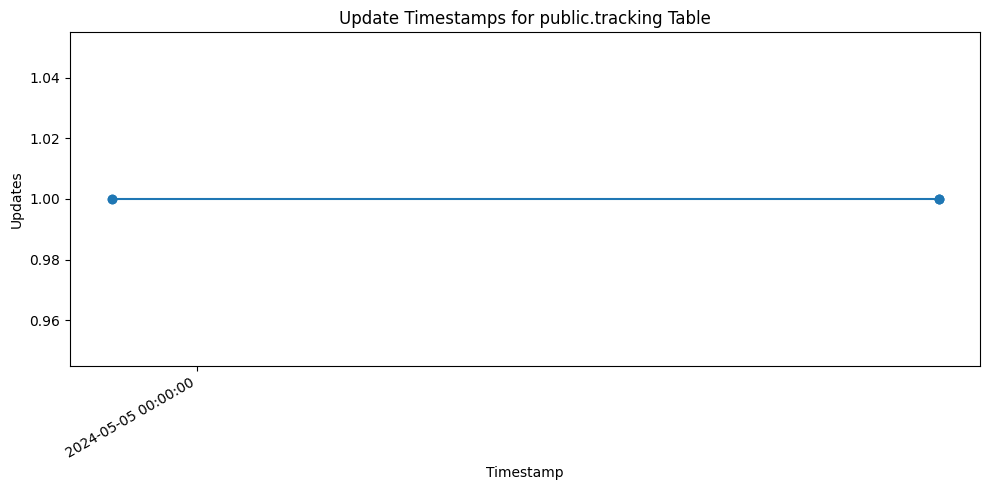

In [7]:
import psycopg2
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Query to get the commit timestamps of updates in the 'public.tracking' table
query = """
SELECT pg_xact_commit_timestamp(xmin), * FROM public.tracking;
"""

# Execute the query
cursor.execute(query)

# Fetch all the results
results = cursor.fetchall()

# Close the cursor and the connection
cursor.close()
conn.close()

# Extract timestamps and other data if needed
timestamps = [result[0] for result in results if result[0] is not None]

# Plotting the time series graph
plt.figure(figsize=(10, 5))
plt.plot_date(timestamps, [1]*len(timestamps), linestyle='solid')

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate() # Rotation
plt.title('Update Timestamps for public.tracking Table')
plt.xlabel('Timestamp')
plt.ylabel('Updates')
plt.tight_layout()

# Show the plot
plt.show()


In [8]:
timestamps

[datetime.datetime(2024, 5, 4, 22, 1, 15, 770717, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 5, 4, 22, 2, 8, 123692, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 5, 5, 17, 13, 2, 92089, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 5, 5, 17, 13, 7, 214737, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 5, 5, 17, 13, 12, 570911, tzinfo=datetime.timezone.utc)]

In [1]:

# Get the list of all tables you want to check
cursor.execute("SELECT table_name FROM information_schema.tables WHERE table_schema='public'")
tables = cursor.fetchall()

# Define the freshness threshold (e.g., 1 day)
freshness_threshold = timedelta(days=1)

# Current time
now = datetime.now()

# Check the freshness of each table
for table in tables:
    table_name = table[0]
    try:
        # Assuming the timestamp column is named 'last_updated'
        query = sql.SQL("SELECT MAX(last_updated) FROM {}").format(sql.Identifier(table_name))
        cursor.execute(query)
        last_updated = cursor.fetchone()[0]

        # Calculate the time difference
        if last_updated:
            time_diff = now - last_updated
            if time_diff > freshness_threshold:
                print(f"Table {table_name} is stale. Last updated {time_diff} ago.")
            else:
                print(f"Table {table_name} is fresh. Last updated {time_diff} ago.")
        else:
            print(f"Table {table_name} has no 'last_updated' records.")

    except psycopg2.Error as e:
        print(f"Error checking table {table_name}: {e}")

# Close the cursor and the connection
cursor.close()
conn.close()


Error checking table artist: column "last_updated" does not exist
LINE 1: SELECT MAX(last_updated) FROM "artist"
                   ^

Error checking table foo: current transaction is aborted, commands ignored until end of transaction block

Error checking table genre: current transaction is aborted, commands ignored until end of transaction block

Error checking table mediatype: current transaction is aborted, commands ignored until end of transaction block

Error checking table playlist: current transaction is aborted, commands ignored until end of transaction block

Error checking table sqlite_schema: current transaction is aborted, commands ignored until end of transaction block

Error checking table album: current transaction is aborted, commands ignored until end of transaction block

Error checking table employee: current transaction is aborted, commands ignored until end of transaction block

Error checking table track: current transaction is aborted, commands ignored until end

In [9]:
results

[(datetime.datetime(2024, 5, 4, 22, 1, 15, 770717, tzinfo=datetime.timezone.utc),
  1),
 (datetime.datetime(2024, 5, 4, 22, 2, 8, 123692, tzinfo=datetime.timezone.utc),
  10),
 (datetime.datetime(2024, 5, 5, 17, 13, 2, 92089, tzinfo=datetime.timezone.utc),
  3),
 (datetime.datetime(2024, 5, 5, 17, 13, 7, 214737, tzinfo=datetime.timezone.utc),
  4),
 (datetime.datetime(2024, 5, 5, 17, 13, 12, 570911, tzinfo=datetime.timezone.utc),
  5)]